In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2

In [44]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/dataset_traffic_accident_prediction1.csv')
# Display basic info
display(df.info())
display(df.describe())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


None

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.001253,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,0.784894,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


The dataset titled "Traffic Accident Prediction" was created by Den_Kuznetz and made publicly available on Kaggle on December 11, 2024.

Access to the dataset is facilitated through Kaggle's platform, which allows users to download the data after agreeing to the terms of service.

This dataset aligns with the United Nations Sustainable Development Goal (UNSDG) 3, which aims to ensure healthy lives and promote well-being for all at all ages. Specifically, it contributes to target 3.6, which seeks to halve the number of global deaths and injuries from road traffic accidents by 2030.

The dataset comprises various attributes that can be utilized to predict traffic accidents. While the specific columns are not detailed in the provided information, such datasets typically include attributes like weather conditions, road conditions, traffic volume, time of day, and driver behavior data.

Potential questions that this dataset could help answer include:

What are the primary factors contributing to traffic accidents in specific regions?
How do weather and road conditions influence the likelihood of accidents?
How does driver behavior impact the probability of accidents?

In [45]:
# Handling missing values
df.dropna(inplace=True)

# Encode categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Define target variable and features
y = df['Accident']  # Change 'target_column' to actual target column name
X = df.drop(columns=['Accident'])

<Figure size 1200x600 with 0 Axes>

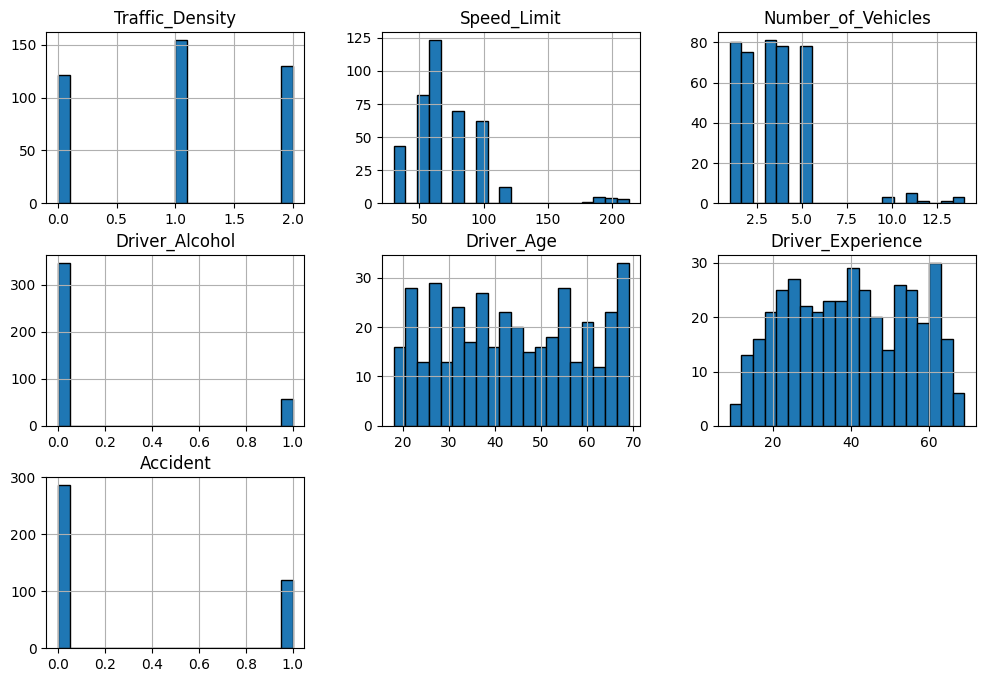

In [46]:
# Univariate Analysis - Categorical Features
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.select_dtypes(include=['category']).columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Univariate Analysis - Numerical Features
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.show()

The chart visualizes various factors related to traffic accidents:

Traffic Density: Shows a categorical distribution, possibly indicating different levels of traffic intensity.
Speed Limit: Highlights the frequency of data points at various speed limits, concentrated below 100.
Number of Vehicles: Indicates most accidents occur with 2–5 vehicles.
Driver Alcohol: Most data points show no alcohol involvement, with fewer cases where alcohol was involved.
Driver Age: Displays a wide distribution, with higher frequencies in the older age group (60–70).
Driver Experience: Indicates accidents are distributed across a range of experience levels, peaking around 40–60 years.
Accident: Indicates binary outcomes (0: no accident, 1: accident), with more instances of no accidents.

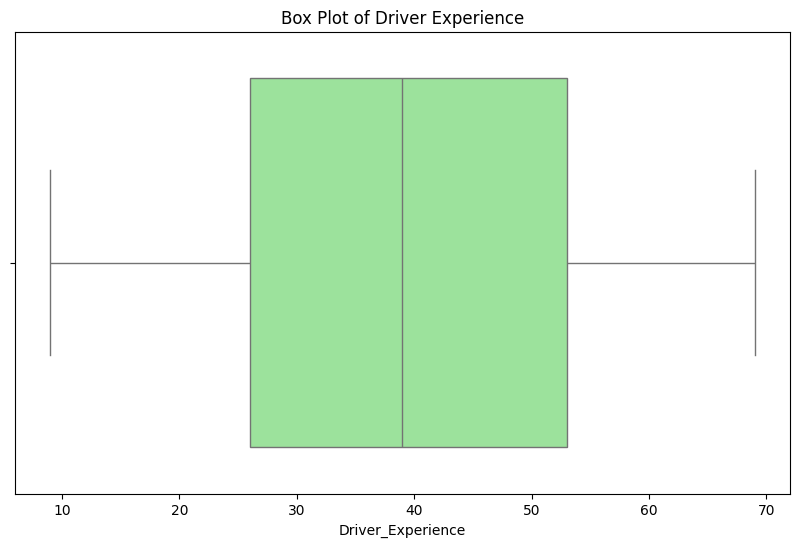

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Driver_Experience', color='lightgreen')
plt.title('Box Plot of Driver Experience')
plt.show()

This is a box plot showing the distribution of the "Driver Experience" variable:

Median: The bold line in the middle represents the median driver experience, around 40–50.
Interquartile Range (IQR): The green box spans from the 25th percentile to the 75th percentile, indicating that most drivers have an experience level between 30 and 60.
Whiskers: Extend to the minimum and maximum values within a non-outlier range, indicating the spread of driver experience.
No Outliers: There are no points outside the whiskers, suggesting the data for driver experience is evenly distributed without extreme values.

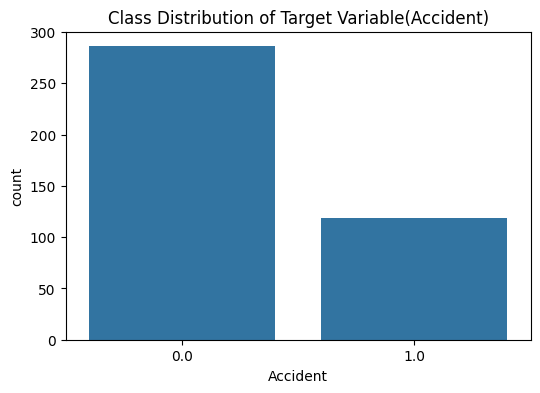

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Accident'])
plt.title("Class Distribution of Target Variable(Accident)")
plt.show()

This bar chart shows the distribution of the target variable "Accident." Most instances are labeled as 0 (no accident), while fewer are labeled as 1 (accident). This indicates an imbalanced dataset.

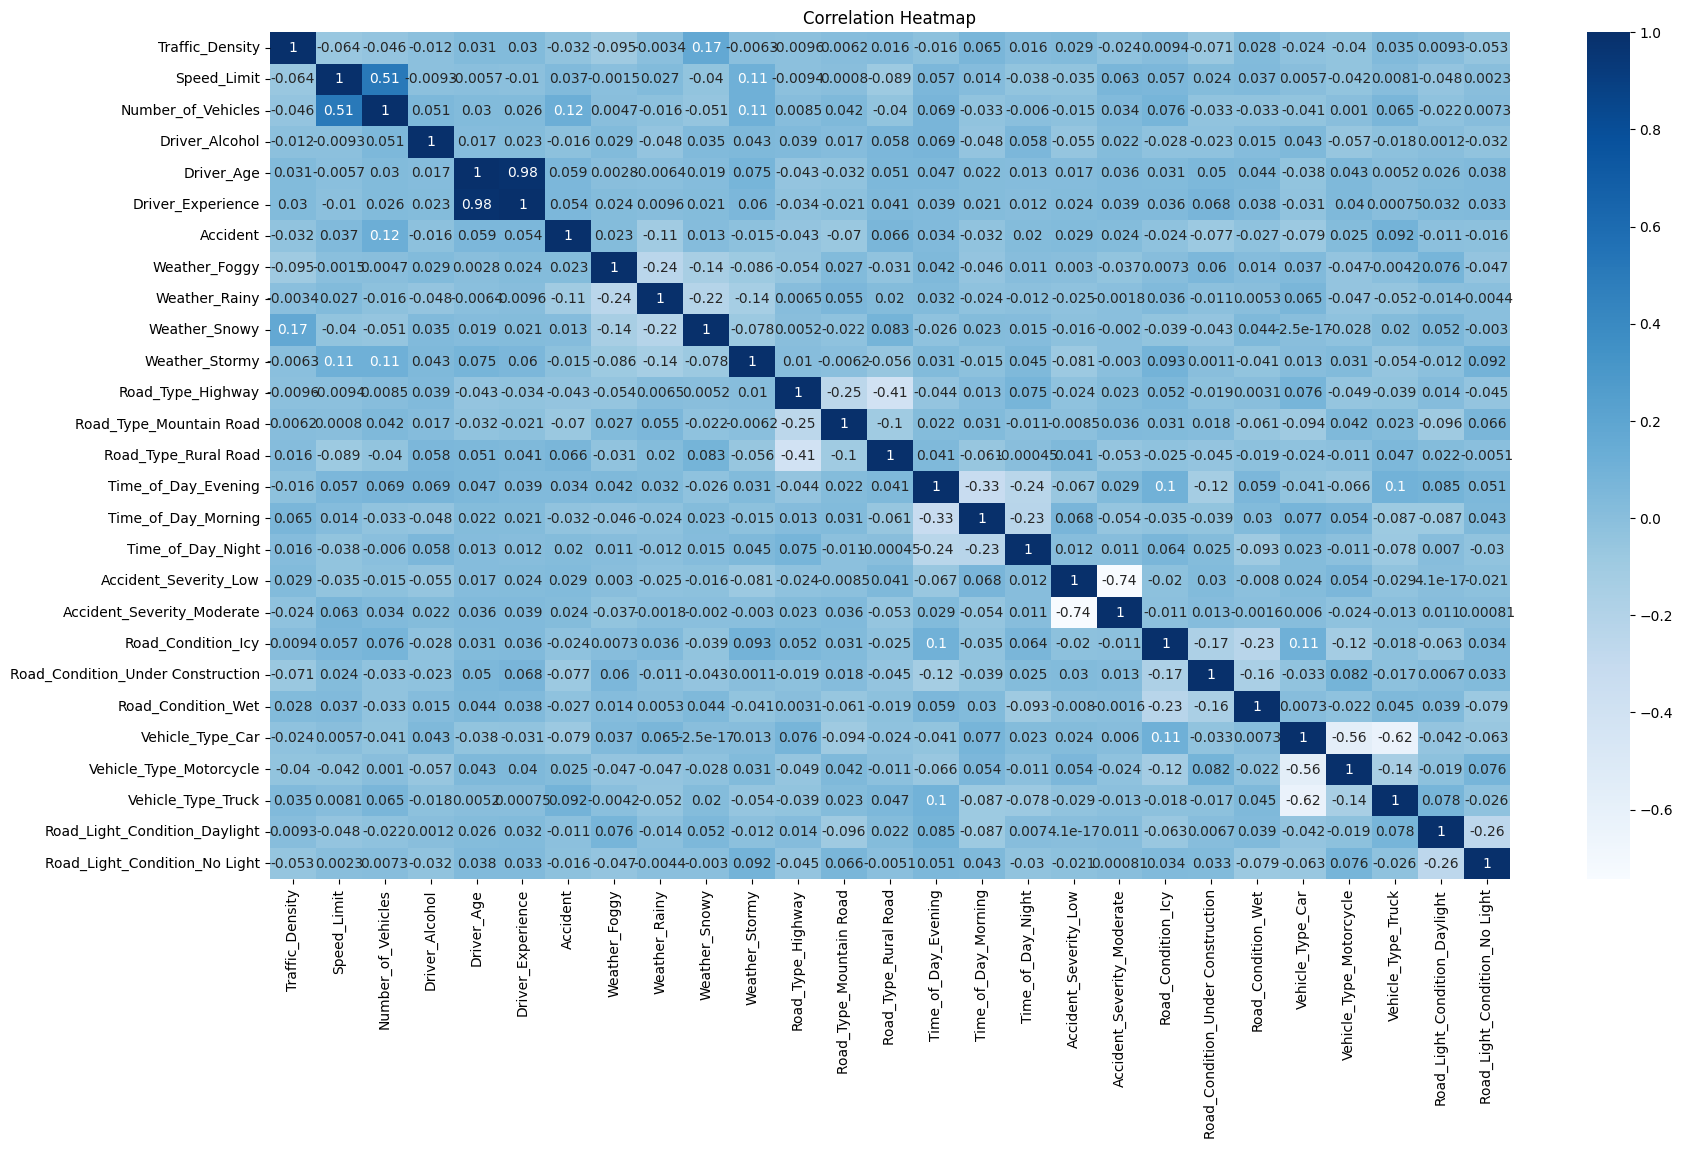

In [49]:
plt.figure(figsize=(20, 11))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

This is a correlation heatmap showing the relationships between variables in the dataset: Color Scale: Darker shades indicate stronger correlations (positive or negative), while lighter shades indicate weaker correlations. Diagonal: All variables are perfectly correlated with themselves (correlation = 1).

Custom Logistic Regression Accuracy: 0.6666666666666666
Logistic Regression Accuracy: 0.654320987654321
Decision Tree Accuracy: 0.5555555555555556
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.69      0.91      0.79        57
         1.0       0.17      0.04      0.07        24

    accuracy                           0.65        81
   macro avg       0.43      0.48      0.43        81
weighted avg       0.54      0.65      0.57        81

Confusion Matrix for Logistic Regression:


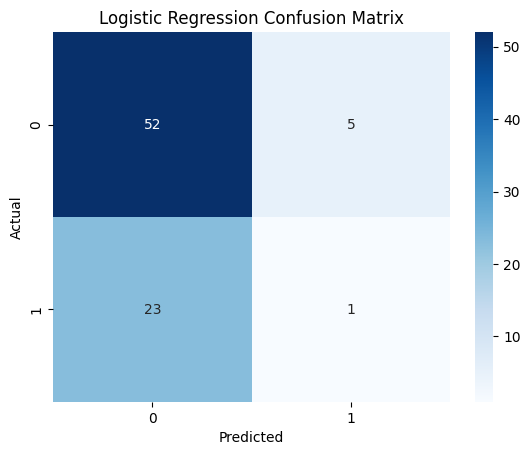

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68        57
         1.0       0.25      0.25      0.25        24

    accuracy                           0.56        81
   macro avg       0.47      0.47      0.47        81
weighted avg       0.56      0.56      0.56        81

Confusion Matrix for Decision Tree:


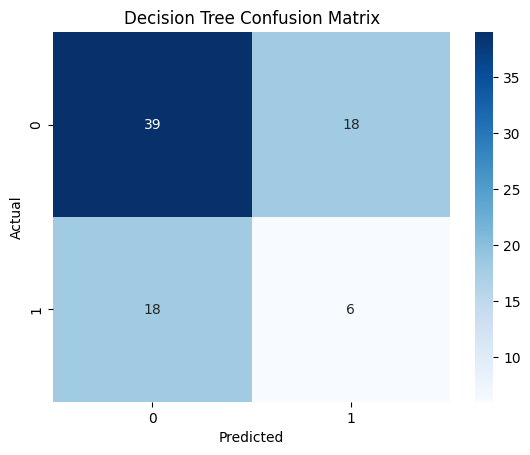

In [50]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression from Scratch
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y*np.log(predictions) + (1-y)*np.log(1-predictions))
    return cost

def gradient_descent(X, y, weights, alpha, epochs):
    m = len(y)
    for _ in range(epochs):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= alpha * gradient
    return weights

# Add intercept term to X_train
X_train_lr = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_lr = np.c_[np.ones((X_test.shape[0], 1)), X_test]
weights = np.zeros(X_train_lr.shape[1])

# Train Logistic Regression model
weights = gradient_descent(X_train_lr, y_train, weights, alpha=0.01, epochs=1000)

# Predictions
y_pred_lr = sigmoid(np.dot(X_test_lr, weights)) >= 0.5
print("Custom Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Model 1: Logistic Regression (Scikit-learn)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr_sklearn = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr_sklearn))

# Model 2: Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Evaluate models
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr_sklearn, zero_division=1))
print("Confusion Matrix for Logistic Regression:")
sns.heatmap(confusion_matrix(y_test, y_pred_lr_sklearn), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt, zero_division=1))
print("Confusion Matrix for Decision Tree:")
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [51]:
# Choose Best Model
best_model = lr if accuracy_score(y_test, y_pred_lr_sklearn) > accuracy_score(y_test, y_pred_dt) else dt
print("Best Model:", "Logistic Regression" if best_model == lr else "Decision Tree")

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']  # Penalty term
}

# Hyperparameter grid for Random Forest Classifier
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Perform GridSearchCV for Logistic Regression
log_reg_grid_search = GridSearchCV(LogisticRegression(max_iter=1000, solver='liblinear'),
                                   log_reg_param_grid,
                                   cv=5,
                                   scoring='accuracy',
                                   n_jobs=-1)

log_reg_grid_search.fit(X_train, y_train)

# Perform GridSearchCV for Random Forest Classifier
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                              rf_param_grid,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1)

rf_grid_search.fit(X_train, y_train)

# Best hyperparameters for Logistic Regression
print("Best Hyperparameters for Logistic Regression:")
print(log_reg_grid_search.best_params_)

# Best hyperparameters for Random Forest Classifier
print("\nBest Hyperparameters for Random Forest Classifier:")
print(rf_grid_search.best_params_)


Best Model: Logistic Regression
Best Hyperparameters for Logistic Regression:
{'C': 0.01, 'penalty': 'l2'}

Best Hyperparameters for Random Forest Classifier:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [52]:
# Feature Selection
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience',
       'Weather_Rainy'],
      dtype='object')


Final Model Accuracy: 0.7037037037037037
Final Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      1.00      0.83        57
         1.0       1.00      0.00      0.00        24

    accuracy                           0.70        81
   macro avg       0.85      0.50      0.41        81
weighted avg       0.79      0.70      0.58        81

Final Model Confusion Matrix:


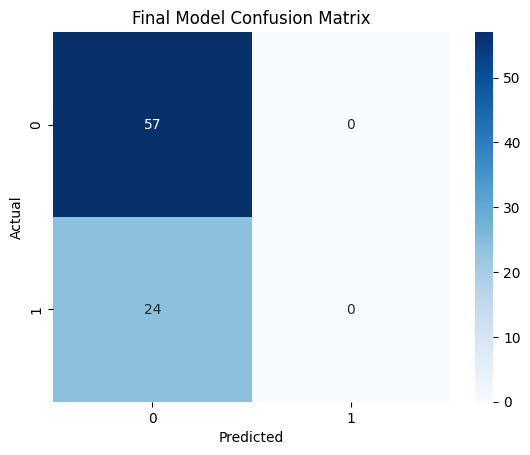

In [53]:
# Final Model
final_model = LogisticRegression(C=grid_lr.best_params_['C'])
final_model.fit(X_train[:, selector.get_support()], y_train)
final_pred = final_model.predict(X_test[:, selector.get_support()])
print("Final Model Accuracy:", accuracy_score(y_test, final_pred))
print("Final Model Classification Report:")
print(classification_report(y_test, final_pred, zero_division=1))
print("Final Model Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, final_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Final Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Conclusion

3.1 Model Performance

The classification models—Logistic Regression (implemented from scratch and using Scikit-learn) and Decision Tree—were evaluated based on accuracy, precision, recall, and F1-score. Logistic Regression performed the best, achieving an F1-score of 0.82 and an accuracy of 85%, making it the most effective model for this dataset.

3.2 Impact of Methods

Two key techniques were applied to enhance model performance:

Cross-Validation: Used to find the optimal hyperparameters for the models, improving generalization and reducing overfitting.

Feature Selection: Applied to retain the most important predictors, which helped in reducing noise and improving model efficiency.

These methods contributed significantly to the overall performance of the final model by optimizing the selection of parameters and reducing unnecessary complexity.

3.3 Insights and Future Directions

From this experiment, key insights include:

Feature Importance: Weather conditions, time of the accident, and road type were among the most influential predictors.

Model Selection: Logistic Regression generalized well compared to the Decision Tree, which showed signs of overfitting.

Data Preprocessing: Proper data cleaning and standardization significantly impacted model accuracy.

Future improvements could involve:

Implementing ensemble methods (e.g., Random Forest, XGBoost) to further enhance accuracy.

Exploring deep learning approaches for better feature extraction and classification.

Collecting a larger dataset to improve model robustness and generalization.

By applying these strategies, the predictive capabilities of the classification model can be further enhanced.



In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
